<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="height:80px; display: inline"  alt="INSA"/></a> 

# Tutoriel en python: Détecter, Mesurer, la Discrimination Indirecte des Algorithmes d'Apprentissage Statistique


**Résumé**
L'objectif de ce calepin est de proposer les codes en python permettant de reproduire une partie des résultats obtenus avec le [tutoriel en R](https://github.com/wikistat/Fair-ML-4-Ethical-AI/blob/master/AdultCensus/AdultCensus-R-biasDetectionCourt.ipynb) de détection et correction élémentaire des biais et discriminations. Il est  indispensable d'avoir exécuté et étudié le [tutoriel en R](https://github.com/wikistat/Fair-ML-4-Ethical-AI/blob/master/AdultCensus/AdultCensus-R-biasDetectionCourt.ipynb) très explicite pour la compréhension de la démarche avant d'exécuter celui-ci en Python pour s'approprier les codes nécessaires.

**Remarques** 
- Tout le début: préparation des données et apprentissage des algorithmes reprend (copier coller) les codes du [tutoriel](https://github.com/wikistat/Apprentissage/blob/master/Adult-Census/Apprent-Python-AdultCensus.ipynb) du dépôt sur l'[apprentissage](https://github.com/wikistat/Apprentissage).
- La production des codes de ce calepin a largement bénéficié de la contribution des étudiants de l'INSA de Toulouse, spécialité *Mathématiques Appliquées* promotion 2020, notamment celle de Paul Charnay et Emmeline Monnédières.
- Ce tutoriel peut être exécuté en local après chargement ou clône du dépôt ou encore dans le nuage *Google Colab* en cliquant sur le lien ci-dessous:

<a href="https://colab.research.google.com/github/wikistat/Fair-ML-4-Ethical-AI/blob/master/AdultCensus/AdultCensus-Python-biasDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 Introduction
### 1.1 Les données
Des données publiques disponibles sur le site [UCI repository](http://archive.ics.uci.edu/ml/) sont extraites de la base de données issue du recensement réalisé aux Etats Unis en 1994. Les deux fichiers *train* et *test* on été réunis en un seul. Ces données son largement utilisées et font référence comme outil de *benchmark* pour comparer les performances de méthodes d’apprentissage. L’objectif est de prévoir, avec plus ou moins de biais, la variable binaire "revenu annuel" supérieur ou inférieur à 50k$. Cette prévision n'impacte pas la personne mais comme la démarche et le contexte sont tout à fait similaires à ce que pourrait faire une banque pour évaluer un risque de crédit, c'est exemple est très illustratif. Ce jeu de données est systématiquement utilisé (bac à sable) pour évaluer les propriétés des algorithmes d'apprentissage équitable ou loyal (*fair learning*) car, contrairement à beaucoup d'autres jeux de données utilisés pour cette fin (*e.g. german credit bank*), la vraie valeur de la variable cible est connue ainsi que l'origine ethnique des personnes concernées.

Dans les données initiales, 48.842 individus sont décrits par les 14 variables du tableau ci-dessous:


|Num|Libellé|Ensemble de valeurs|
|-|---------:|-------------------:|
|1|`Age`|real|
|2|`workClass`|Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked|
|3|`fnlwgt`|real|
|4|`education`|Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool|
|5|`educNum`|integer|
|6|`mariStat`|Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse|
|7|`occup`|Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces|
|8|`relationship`|Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
|9|`origEthn`|White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black|
|10|`sex`|Female, Male|
|11|`capitalGain`|real| 
|12|`capitalLoss`|real|
|13|`hoursWeek`|real|
|14|`nativCountry`|United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands|
|15|`income`|>50K, <=50K|


### 1.2 Préparation des données

Le traitement commence par une préparation détaillée des données:
- lecture et prise en charge des données en remarquant que la variable `fnlwgt` (Final sampling weight) a un [statut particulier](http://web.cs.wpi.edu/~cs4341/C00/Projects/fnlwgt) pas très clair; elle est éliminée;
- suppression des observations présentant des données manquantes, erreurs ou incohérences,
- regroupement des modalités trop rares, 
- suppression des variables redondantes. 

Cette phase est notoirement différente de la stratégie de Friedler et al. (2019) qui, par principe, analysent automatiquement toutes les données brutes sans le préalable d'une analyse statistique descriptive élémentaire.

### 1.3 Estimation des biais

Parmi tous les critères de biais existant susceptibles de mettre en évidence une discrimination indirecte (Zliobaitė, 2015)), trois sont privilégiés (cf. Vermat et Rubin, 2018): 
1. discrimination indirecte par l'effet disproportionné: *disparate impact* ou *demographic equality*
2. comparaison des taux d'erreur conditionnels: *overall error equality*
3. comparaison des rapports de cote: *Conditional procedure accuracy equality* ou *disparate mistreatment* ou *equalized odds*.

L'effet disproportionné est considéré ici en priorité mais les outils  (fonctions) d'estimation par intervalle de confiance des autres biais sont fournis.

## 2 Pris en charge et exploration des données
Lors de cette phase de travail, il y a deux points de vue radicalement différents. 
- Celui illustré par Friedler et al. (2019) consiste à entraîner un algorithme sur les données brutes sans exploration "humaine" préalable faisant appel à des compétences statistiques; par principe, tout est automatisé.
- Celui proposé dans ce tutoriel est le résultat d'une démarche nécessitant des compétences élémentaires  statistiques pour explorer les données, comprendre leur structure, détecter les problèmes potentiels: données manquantes, atypiques, biais, classes rares, distributions "anormales"...) afin d'y remédier au mieux de l'intérêt de l'objectif poursuivi.

Remarquons que ce deuxièmme point de vue de connaissance des données semble plus respectueux des [lignes directrices des experts de la CE pour une IA igne de confiance](https://ec.europa.eu/futurium/en/ai-alliance-consultation) et anticipe donc un futur réglement européen annoncé par le [livre blanc](https://ec.europa.eu/info/sites/info/files/commission-white-paper-artificial-intelligence-feb2020_fr.pdf).
### 2.1 Lecture 
Deux possibilités pour charger les données issues du dépôt de l'UCI en fonction du mode d'exécution adopté; en local après avoir installé Python et ses librairies ou à distance dans le nuage *Google Colab*. 
1. Dans le premier cas, les données sont chargées en même temps que le dépôt *Github*, **changer le chemin d'accès en conséquence** en décommentant la commande `path` ci-dessous afin d'économiser le temps de chargement. 
2. Dans le deuxième cas, <a href="https://colab.research.google.com/github/wikistat/Fair-ML-4-Ethical-AI/blob/master/AdultCensus/AdultCensus-Python-biasDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
les données sont chargées et lues dans l'environnement de *Google Colab*; il est nécessaire d'exécuter la cellule suivante:

In [1]:
%matplotlib inline
# Importations 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
adult=pd.read_csv('adultTrainTest.csv')
adult.head()

,age,workClass,fnlwgt,education,educNum,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 2.2 Regroupement des modalités trop peu fréquentes

In [2]:
def create_categorical_data(df, column_name):
    cat_columns = pd.Categorical(df[column_name], ordered=False)
    return cat_columns

In [3]:
print(np.sort(adult["mariStat"].unique()))

[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']


In [4]:
# mariStat
cat_name_dic = {" Never-married": "Never-Married", " Married-AF-spouse": "Married",
                " Married-civ-spouse": "Married", " Married-spouse-absent": "Not-Married",
                " Separated": "Not-Married", " Divorced": "Not-Married", " Widowed": "Widowed"}
adult['mariStat'] = adult.mariStat.map(cat_name_dic)

In [5]:
print(np.sort(adult["nativCountry"].unique()))

[' ?' ' Cambodia' ' Canada' ' China' ' Columbia' ' Cuba'
 ' Dominican-Republic' ' Ecuador' ' El-Salvador' ' England' ' France'
 ' Germany' ' Greece' ' Guatemala' ' Haiti' ' Holand-Netherlands'
 ' Honduras' ' Hong' ' Hungary' ' India' ' Iran' ' Ireland' ' Italy'
 ' Jamaica' ' Japan' ' Laos' ' Mexico' ' Nicaragua'
 ' Outlying-US(Guam-USVI-etc)' ' Peru' ' Philippines' ' Poland'
 ' Portugal' ' Puerto-Rico' ' Scotland' ' South' ' Taiwan' ' Thailand'
 ' Trinadad&Tobago' ' United-States' ' Vietnam' ' Yugoslavia']


In [6]:
# nativCountry
cat_country = {" Cambodia": "SE-Asia", " Canada": "British-Commonwealth", " China": "China", " Columbia": "South-America",
               " Cuba": "Other", " Dominican-Republic": "Latin-America", " Ecuador": "South-America",
               " El-Salvador": "South-America", " England": "British-Commonwealth", " France": "Euro_1",
               " Germany": "Euro_1", " Greece": "Euro_2", " Guatemala": "Latin-America", " Haiti": "Latin-America",
               " Holand-Netherlands": "Euro_1", " Honduras": "Latin-America", " Hong": "China", " Hungary": "Euro_2",
               " India": "British-Commonwealth", " Iran": "Other", " Ireland": "British-Commonwealth", " Italy": "Euro_1",
               " Jamaica": "Latin-America", " Japan": "Other", " Laos": "SE-Asia", " Mexico": "Latin-America",
               " Nicaragua": "Latin-America", " Outlying-US(Guam-USVI-etc)": "Latin-America", " Peru": "South-America",
               " Philippines": "SE-Asia", " Poland": "Euro_2", " Portugal": "Euro_2", " Puerto-Rico": "Latin-America",
               " Scotland": "British-Commonwealth", " South": "Euro_2", " Taiwan": "China", " Thailand": "SE-Asia",
               " Trinadad&Tobago": "Latin-America", " Vietnam": "SE-Asia", " United-States": "United-States",
               " Yugoslavia": "Euro_2"}
adult["nativCountry"] = adult.nativCountry.map(cat_country)

In [7]:
print(np.sort(adult["education"].unique()))

[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']


In [8]:
# education
cat_educ = {" 10th": "Dropout", " 11th": "Dropout", " 12th": "Dropout", " 1st-4th": "Dropout", " 5th-6th": "Dropout",
            " 7th-8th": "Dropout", " 9th": "Dropout", " Assoc-acdm": "Associates", " Assoc-voc": "Associates",
            " Bachelors": "Bachelors", " Doctorate": "Doctorate", " HS-grad": "HS-grad", " Masters": "Masters",
            " Preschool": "Dropout", " Prof-school": "Prof-School", " Some-college": "HS-Graduate"}
adult["education"] = adult.education.map(cat_educ)

In [9]:
print(np.sort(adult["workClass"].unique()))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


In [10]:
# workClass
cat_work = {" Federal-gov": "Federal-Govt", " Local-gov": "Other-Govt", " State-gov": "Other-Govt", " Private": "Private",
            " Self-emp-inc": "Self-Employed", " Self-emp-not-inc": "Self-Employed", " Without-pay": "Not-Working",
            " Never-worked": "Not-Working"}
adult["workClass"] = adult.workClass.map(cat_work)

In [11]:
print(np.sort(adult["occup"].unique()))

[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [12]:
# occup
cat_occup = {" Adm-clerical": "Admin", " Craft-repair": "Blue-Collar", " Exec-managerial": "White-Collar",
             " Farming-fishing": "Blue-Collar", " Handlers-cleaners": "Blue-Collar", " Machine-op-inspct": "Blue-Collar",
             " Other-service": "Service", " Priv-house-serv": "Service", " Prof-specialty": "Professional",
             " Protective-serv": "Other-occups", " Sales": "Sales", " Tech-support": "Other-occups",
             " Transport-moving": "Blue-Collar"}
adult["occup"] = adult.occup.map(cat_occup)

In [13]:
print(np.sort(adult["origEthn"].unique()))

[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']


In [14]:
# origEthn
cat_orig = {" White": "CaucYes", " Black": "CaucNo", " Amer-Indian-Eskimo": "CaucNo", " Asian-Pac-Islander": "CaucNo",
            " Other": "CaucNo"}
adult["origEthn"] = adult.origEthn.map(cat_orig)

In [15]:
print(np.sort(adult["income"].unique()))

[' <=50K' ' >50K']


In [16]:
def create_categorical_data_rename(df, column_name, cat_name_dic):
    cat_columns = pd.Categorical(df[column_name], ordered=False)
    new_categorie = [cat_name_dic[old_name] for old_name in cat_columns.categories]
    return cat_columns.rename_categories(new_categorie)

In [17]:
adult["income"] = create_categorical_data_rename(adult, "income", {" <=50K": "incLow", " >50K": "incHigh"})

In [18]:
for name in ["workClass", "education", "mariStat", "occup", "relationship", "origEthn", "sex", "nativCountry"]:
    adult[name] = create_categorical_data(adult, name)

### 2.3 Transformations de variables quantitatives
Les distributions sont trop disymétriques pour intégrer un modèle linéaire sensible à des valeurs extrêmes.

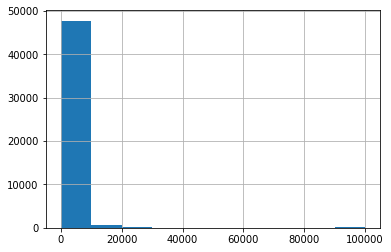

In [19]:
adult["capitalGain"].hist()
plt.show()

In [20]:
adult["LcapitalGain"] = np.log(1 + adult["capitalGain"])
adult["LcapitalLoss"] = np.log(1 + adult["capitalLoss"])

### 2.4 Suppressions de données manquantes ou incohérentes

In [21]:
adult = adult[np.logical_not(adult.isnull().any(axis=1))]
adult.head()

,age,workClass,fnlwgt,education,educNum,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry,income,LcapitalGain,LcapitalLoss
0,39,Other-Govt,77516,Bachelors,13,Never-Married,Admin,Not-in-family,CaucYes,Male,2174,0,40,United-States,incLow,7.684784,0.0
1,50,Self-Employed,83311,Bachelors,13,Married,White-Collar,Husband,CaucYes,Male,0,0,13,United-States,incLow,0.000000,0.0
2,38,Private,215646,HS-grad,9,Not-Married,Blue-Collar,Not-in-family,CaucYes,Male,0,0,40,United-States,incLow,0.000000,0.0
3,53,Private,234721,Dropout,7,Married,Blue-Collar,Husband,CaucNo,Male,0,0,40,United-States,incLow,0.000000,0.0
4,28,Private,338409,Bachelors,13,Married,Professional,Wife,CaucNo,Female,0,0,40,Other,incLow,0.000000,0.0


In [22]:
adult = adult[(adult["sex"] != "Female") | (adult["relationship"] != "Husband")]
adult = adult[(adult["sex"] != "Male") | (adult["relationship"] != "Wife")]

### 2.5 Description statistique élémentaire
Mettre en évidence des difficultés présentes sur certaines variables ou couples de variables.

In [23]:
adult.describe()

,age,fnlwgt,educNum,capitalGain,capitalLoss,hoursWeek,LcapitalGain,LcapitalLoss
count,45208.000000,4.520800e+04,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000
mean,38.550035,1.897257e+05,10.118298,1101.610003,88.581114,40.937776,0.740792,0.355432
std,13.218340,1.056474e+05,2.552960,7507.512510,404.927674,12.007784,2.466579,1.595791
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,1.173810e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,47.000000,2.379155e+05,13.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,11.512925,8.379539


**Q** Que dire de la distribution de la variable `age`, de celle `income` ?

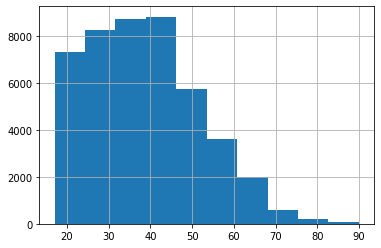

In [24]:
adult["age"].hist()
plt.show()

In [25]:
adult["income"].value_counts()

incLow     34004
incHigh    11204
Name: income, dtype: int64

In [26]:
adult["relationship"].value_counts()

 Husband           18661
 Not-in-family     11697
 Own-child          6624
 Unmarried          4788
 Wife               2091
 Other-relative     1347
Name: relationship, dtype: int64

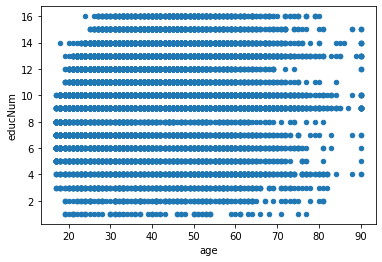

In [27]:
adult.plot(kind="scatter",x="age",y="educNum")
plt.show()

**Q** Que dire des liaisons : `age x hoursWeek`, `age x income`, `sex x income` ?

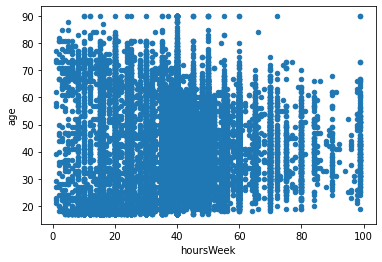

In [28]:
adult.plot(kind="scatter",x="hoursWeek",y="age")
plt.show()

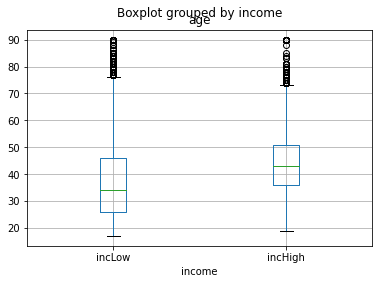

In [29]:
adult.boxplot(column="age",by="income")
plt.show()

**Q** Que dire des redondances ci-dessous?

In [30]:
table=pd.crosstab(adult["education"],adult["educNum"])
print(table) 

educNum      1    2    3    4    5     6     7    8      9     10    11    12  \
education                                                                       
Associates    0    0    0    0    0     0     0    0      0     0  1959  1507   
Bachelors     0    0    0    0    0     0     0    0      0     0     0     0   
Doctorate     0    0    0    0    0     0     0    0      0     0     0     0   
Dropout      72  222  449  823  676  1223  1619  576      0     0     0     0   
HS-Graduate   0    0    0    0    0     0     0    0      0  9895     0     0   
HS-grad       0    0    0    0    0     0     0    0  14778     0     0     0   
Masters       0    0    0    0    0     0     0    0      0     0     0     0   
Prof-School   0    0    0    0    0     0     0    0      0     0     0     0   

educNum        13    14   15   16  
education                          
Associates      0     0    0    0  
Bachelors    7569     0    0    0  
Doctorate       0     0    0  544  
Dropout  

In [31]:
table=pd.crosstab(adult["mariStat"],adult["relationship"])
print(table)

relationship    Husband   Not-in-family   Other-relative   Own-child  \
mariStat                                                               
Married           18661              19              184         126   
Never-Married         0            6686              819        5862   
Not-Married           0            4305              285         616   
Widowed               0             687               59          20   

relationship    Unmarried   Wife  
mariStat                          
Married                 0   2091  
Never-Married        1223      0  
Not-Married          3054      0  
Widowed               511      0  


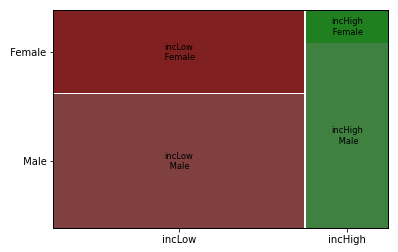

In [33]:
# Mosaic plots
from statsmodels.graphics.mosaicplot import mosaic
mosaic(adult,["income","sex"])
plt.show()

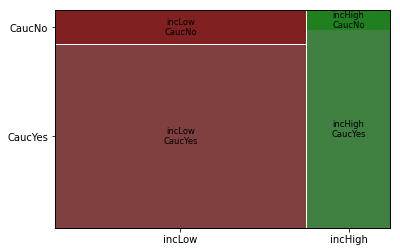

In [34]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(adult,["income","origEthn"])
plt.show()

Quelques modifications comlémentaires sont apportées de la base. Des variables sont supprimées afin de ne garder qu'une seule présence d'une information sensible: genre et origine ethnique.
- Suppression de la variable `fnlwgt` qui n'a guère de signification pour cette analyse.
- Suppression de la variable `workClass` redondante acvec l'occupation.
- Suppression de la variable `education` redondante avec le niveau de diplôme.
- Suppression de la variable `capitalGain` et `capitalLoss` remplacée par leur transformations log.
- Création d'une variable binaire `Child`: présence ou non d'enfants.
- Suppression de la variable `relationship` redondante avec le genre et le statut marital.
- Suppression de la variable `nativCountry` redondante avec l'origine ethnique.

In [35]:
print(np.sort(adult["relationship"].unique()))

[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']


In [36]:
cat_orig = {' Husband':"ChildNo",' Not-in-family':"ChildNo",' Other-relative':"ChildNo",' Own-child':"ChildYes",' Unmarried':"ChildNo",' Wife':"ChildNo"}
adult["child"] = adult.relationship.map(cat_orig)

In [37]:
adult=adult.drop(["workClass","education","fnlwgt","nativCountry","relationship", 
                  "capitalGain", "capitalLoss"],axis=1)

In [38]:
adult.head()

,age,educNum,mariStat,occup,origEthn,sex,hoursWeek,income,LcapitalGain,LcapitalLoss,child
0,39,13,Never-Married,Admin,CaucYes,Male,40,incLow,7.684784,0.0,ChildNo
1,50,13,Married,White-Collar,CaucYes,Male,13,incLow,0.000000,0.0,ChildNo
2,38,9,Not-Married,Blue-Collar,CaucYes,Male,40,incLow,0.000000,0.0,ChildNo
3,53,7,Married,Blue-Collar,CaucNo,Male,40,incLow,0.000000,0.0,ChildNo
4,28,13,Married,Professional,CaucNo,Female,40,incLow,0.000000,0.0,ChildNo


### 2.6 Variables indicatrices

**Q** Pourquoi l’introduction de *dummy variables*? 

In [39]:
adultDum=pd.get_dummies(adult[["mariStat","occup","origEthn","sex","child"]])
adultDum.head()

,mariStat_Married,mariStat_Never-Married,mariStat_Not-Married,mariStat_Widowed,occup_Admin,occup_Blue-Collar,occup_Other-occups,occup_Professional,occup_Sales,occup_Service,occup_White-Collar,origEthn_CaucNo,origEthn_CaucYes,sex_ Female,sex_ Male,child_ChildNo,child_ChildYes
0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0
3,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0


In [40]:
adultJoin = adult[["age","educNum","hoursWeek","LcapitalGain","LcapitalLoss","income"]].join(adultDum)

In [41]:
adultJoin.head()

,age,educNum,hoursWeek,LcapitalGain,LcapitalLoss,income,mariStat_Married,mariStat_Never-Married,mariStat_Not-Married,mariStat_Widowed,...,occup_Professional,occup_Sales,occup_Service,occup_White-Collar,origEthn_CaucNo,origEthn_CaucYes,sex_ Female,sex_ Male,child_ChildNo,child_ChildYes
0,39,13,40,7.684784,0.0,incLow,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
1,50,13,13,0.000000,0.0,incLow,1,0,0,0,...,0,0,0,1,0,1,0,1,1,0
2,38,9,40,0.000000,0.0,incLow,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
3,53,7,40,0.000000,0.0,incLow,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,28,13,40,0.000000,0.0,incLow,1,0,0,0,...,1,0,0,0,1,0,1,0,1,0


In [42]:
adult.shape

(45208, 11)

### 2.7 Préparation des échantillons
La base de données est réduite par tirage aléatoire puis divisée en deux échantillons d'apprentissage et de test.

In [43]:
# possibilité de réduire la taille de l'apprentissage par échantillonnage aléatoire ou pas
ind_ech = np.random.choice(adultJoin.index.values, 20000, replace=False)
#adultEch=adultJoin.loc[ind_ech]
adultEch=adultJoin
# Variable cible
Y=adultEch["income"]
# Variables prédictives
X=adultEch.drop(["income"],axis=1)

In [44]:
from sklearn.model_selection import train_test_split  
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=11)

In [45]:
sorted(X_train)

['LcapitalGain',
 'LcapitalLoss',
 'age',
 'child_ChildNo',
 'child_ChildYes',
 'educNum',
 'hoursWeek',
 'mariStat_Married',
 'mariStat_Never-Married',
 'mariStat_Not-Married',
 'mariStat_Widowed',
 'occup_Admin',
 'occup_Blue-Collar',
 'occup_Other-occups',
 'occup_Professional',
 'occup_Sales',
 'occup_Service',
 'occup_White-Collar',
 'origEthn_CaucNo',
 'origEthn_CaucYes',
 'sex_ Female',
 'sex_ Male']

## 3 Prévision du seuil de revenu 
Une comparaison détaillée (cf. le [tutoriel](https://github.com/wikistat/Apprentissage/blob/master/Adult-Census/Apprent-Python-AdultCensus.ipynb)) de la plupart des modèles et algorithmes de prévision du seuil de revenu en fonction des différentes variables met en évidence des résultats de prévision un peu meilleurs obtenus par l'algorithme de *gradient boosting* (version xtrem). Néanmoins, on peut se limiter ici à un choix plus restreint de modèles et algorithmes pour comprendre l'impact sur la discrimination.
- la régression logistique (linéaire) interprétable; 
- les forêts aléatoires (non linéaire) conduisent à une meilleure précision mais sans capacité d'interprétation,
- *gradient boosting* (idem).

### 3.1 Prévision par [régression logistique](http://wikistat.fr/pdf/st-m-app-rlogit.pdf)
**Q** Comment est opérée la sélection de variables? 

**Q** Commenter  les options de la commande  `GridSearchCV`. A quoi sert `param` ?

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import time
tps0=time.perf_counter()
# Optimisation du paramètre de pénalisation
# grille de valeurs
param=[{"C":[0.9,1,1.1,1.2,1.3,1.4]}]
logit = GridSearchCV(LogisticRegression(penalty="l1",solver="liblinear"), param,cv=10,n_jobs=-1)
logitOpt=logit.fit(X_train, Y_train)  # GridSearchCV est lui même un estimateur
# paramètre optimal
logitOpt.best_params_["C"]
tps1=(time.perf_counter()-tps0)
print("Temps logit = %f, Meilleur taux = %f, Meilleur paramètre = %s" % (tps1,
                              1.-logitOpt.best_score_,logitOpt.best_params_))

Temps logit = 49.009988, Meilleur taux = 0.162224, Meilleur paramètre = {'C': 1.1}


In [47]:
ClogOpt=logitOpt.best_params_['C'] # pour des étapes ultérieures

In [48]:
# erreur sur l'échantillon test
1-logitOpt.score(X_test, Y_test)

0.16146870161468707

In [49]:
# Prévision
y_chap = logitOpt.predict(X_test)
# matrice de confusion
table=pd.crosstab(y_chap,Y_test)
print(table)

income   incLow  incHigh
row_0                   
incHigh     551     1309
incLow     6273      909


**Q** Quels algorithmes pourraient être exécutés en R pour la régression logistique? 

**Q** Que dire de l'interprétabilité des résultats par rapport à ceux de R?

In [50]:
# Coefficients
LogisticRegression(penalty="l1",C=logitOpt.best_params_['C'],
                   solver='liblinear').fit(X_train, Y_train).coef_

array([[-0.02281117, -0.287147  , -0.02660953, -0.20549666, -0.14910991,
         0.39597748,  2.77051346,  2.50336817,  2.53312669,  0.43099837,
         0.75808288,  0.11635402, -0.0050261 ,  0.28529088,  1.41775782,
        -0.25054066,  1.13660951,  1.0105142 ,  1.10761216,  0.91355521,
         1.17516663,  2.11594451]])

### 3.2 [Forêts aléatoires](http://wikistat.fr/pdf/st-m-app-agreg.pdf)
En R, il peut être intéressant de construire un arbre binaire de classification. 

**Q** Pourquoi un arbre fourni par `scikit-learn` présente beaucoup moins d'intérêt?

**Q** Commenter les choix de tous les paramètres ci-dessous.

In [55]:
from sklearn.ensemble import RandomForestClassifier 
# définition des paramètres
forest = RandomForestClassifier(n_estimators=500, 
   criterion='gini', max_depth=None,
   min_samples_split=6, min_samples_leaf=5, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True,n_jobs=-1)
# apprentissage
rfFit = forest.fit(X_train,Y_train)
print(1-rfFit.oob_score_)

c:\Users\Valentin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.13946800862688713


In [56]:
# erreur de prévision sur le test
1-rfFit.score(X_test,Y_test)

0.13879672638796725

L'exécution ci-dessous peut êêtre un peu longue...

In [57]:
# optimisation du paramètre
import time
from sklearn.model_selection import GridSearchCV
tps0=time.perf_counter()
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestClassifier(n_estimators=500,min_samples_split=6, min_samples_leaf=5,n_jobs=-1),param,cv=10,n_jobs=-1)
rfOpt=rf.fit(X_train, Y_train)
# paramètre optimal
tps1=(time.perf_counter()-tps0)
print("Temps r forest = %f, Meilleur taux = %f, Meilleur paramètre = %s" % (tps1,
                                    1. - rfOpt.best_score_,rfOpt.best_params_))

KeyboardInterrupt: 

In [ ]:
CrfOpt=rfOpt.best_params_["max_features"]

In [ ]:
# erreur de prévision sur le test
1-rfOpt.score(X_test,Y_test)

In [ ]:
# prévision
y_chap = rfFit.predict(X_test)
# matrice de confusion
table=pd.crosstab(y_chap,Y_test)
print(table)

In [ ]:
rf= RandomForestClassifier(n_estimators=100,max_features=6, min_samples_leaf=5)
rfFit=rf.fit(X_train, Y_train)
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(20):
    print(X_train.columns[indices[f]], importances[indices[f]])

In [ ]:
# Graphe des importances
plt.figure()
plt.title("Importances des variables")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

**Q** Comment est obtenu le graphique? Quel indicateur d'importance est utilisé? Comment interpréter ces résultats?

### 3.3 [Gradient boosting](http://wikistat.fr/pdf/st-m-app-agreg.pdf)
L'algorithme *machine gradient boosting* pour améliorer les performances.Il est probable que la version XGBoost permette de gagner encore un peu en précision mais ce n'est pas l'objectif ici mais plutôt d'observer l'impact sur le biais de ce type d'algorithme.

**Q** Pourquoi pas de paramètre `njobs=-1`? Corrélativement quel est l'intérêt de la librairie XGBoost?

**Q** En plus de celui optimisé, quels sont les 2 principaux paramètres de cet algorithme laissés par défaut?

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
tps0=time.perf_counter()
param=[{"n_estimators":[300, 350, 400]}]
gbm= GridSearchCV(GradientBoostingClassifier(),param,cv=10)
gbmOpt=gbm.fit(X_train, Y_train)
# paramètre optimal
tps1=(time.perf_counter()-tps0)
print("Temps boosting = %f, Meilleur taux = %f, Meilleur paramètre = %s" % (tps1,
                        1. - gbmOpt.best_score_,gbmOpt.best_params_))

In [ ]:
CgbmOpt=gbmOpt.best_params_["n_estimators"]

In [ ]:
# erreur de prévision sur le test
1-gbmOpt.score(X_test,Y_test)

In [ ]:
# prévision de l'échantillon test
y_chap = gbmOpt.predict(X_test)
# matrice de confusion
table=pd.crosstab(y_chap,Y_test)
print(table)

Le [tutoriel](https://github.com/wikistat/Apprentissage/blob/master/Adult-Census/Apprent-Python-AdultCensus.ipynb) du dépôt d'apprentissage compare finement les performances des algoritmes: courbes ROC et [Validation croisée](http://wikistat.fr/pdf/st-m-app-risque.pdf) *Monte Carlo*.

## 4 Détection des discriminations
Cette section est focalisée sur les codes des fonctions d'estimations par intervalle de confiance des principaux indicateurs de biais. Un travail laissé en exercice permettrait d'obtenir facilement les résultats complémentaires du [tutoriel en R](https://github.com/wikistat/Fair-ML-4-Ethical-AI/blob/master/AdultCensus/AdultCensus-R-biasDetectionCourt.ipynb): suppression de la variable sensible du modèle, inutilité du *testing*, atténuation élémentaire du biais et discrimination positive, effet de cette atténuation sur les autres biais.

### 4.1 Estimation de l'effet disproportionné
Fontions d'estimation pontuelle et par intervalle de confiance de l'effet disproportionné.

In [ ]:
def DI(tab):
    """
    Calcule le disparate impact ponctuel d'une table de contingence 
    Colonnes = Variable sensible
    Lignes = variable cible
    """
    tab_np = tab.to_numpy()
    DI = (tab_np[0,0] / (tab_np[1,0] + tab_np[0,0])) / (tab_np[0,1] / (tab_np[1,1] + tab_np[0,1]))
    return DI

In [ ]:
def dispImp(var_sens, var_cible, alpha=0.05):
    """
    Estimation du disparate impact par intervalle de confiance  
                                                             
  Cette fonction prend trois arguments en entrée :           
    - La variable binaire considérée comme sensible          
    - La variable cible Y ou sa prévision                    
    - alpha par défaut 0.05                                  
  Elle renvoie la valeur Tn du disparate impact et des bornes de l'intervalle de confiance                
  Attention à l'ordre lexicographique des niveaux des facteurs, le premier est par convention celui jugé défavorable  
    """

    S = var_sens.astype('int')
    Y = var_cible.astype('int')
    n = len(S)
    
    pi_1 = np.sum(S)/n #estimated P(S=1)
    pi_0 = 1 - pi_1 #estimated P(S=0)
    p_1 = np.sum(S * Y) / n #estimated P(g(X)=1, S=1)
    p_0 = np.sum((1 - S) * Y) / n #estimated P(g(X)=1, S=0)
    Tn = p_0 * pi_1 / (p_1 * pi_0) # disparate impact
    grad_h = lambda x: np.array((x[3]/(x[1]*x[2]), -x[0]*x[3]/(x[1]**2 * x[2]), -x[0]*x[3]/(x[2]**2 * x[1]), x[0]/(x[2]*x[1])))
    grad = grad_h([p_0, p_1, pi_0, pi_1])
    Cov_4 = np.array([(0, -p_0*p_1, pi_1*p_0, -pi_1*p_0), (0, 0, -pi_0*p_1, pi_0*p_1), (0,0,0,-pi_0*pi_1), (0,0,0,0)]).T
    Cov_4 = Cov_4 + Cov_4.T + np.diag((p_0*(1-p_0), p_1*(1-p_1),pi_0*pi_1,pi_0*pi_1))
    sigma = np.sqrt((grad.dot(Cov_4)).dot(grad))
    
    lower_lim = Tn - (sigma * scipy.stats.norm.ppf(1-alpha/2)) / np.sqrt(n)
    upper_lim = Tn + (sigma * scipy.stats.norm.ppf(1-alpha/2)) / np.sqrt(n)
    
    return np.array([lower_lim, Tn, upper_lim])

In [ ]:
logitFixe = LogisticRegression(penalty="l1",solver="liblinear", C=ClogOpt)
logitFixe.fit(X_train, Y_train)
y_chap_logit = logitFixe.predict(X_test)

In [ ]:
rfFixe = RandomForestClassifier(n_estimators=500, max_features=CrfOpt)
rfFixe.fit(X_train, Y_train)
y_chap_rf = rfFixe.predict(X_test)

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
gbmFixe = GradientBoostingClassifier(n_estimators=CgbmOpt)
gbmFixe.fit(X_train, Y_train)
y_chap_gbm = gbmFixe.predict(X_test)

In [ ]:
# récupération des matrices de confusion
tableSex_logit = pd.crosstab(y_chap_logit, X_test['sex_ Male'].map({0: "Female", 1: "Male"}),
                          rownames=['Sex'], colnames=['Inc'])
tableSex_rf = pd.crosstab(y_chap_rf, X_test['sex_ Male'].map({0: "Female", 1: "Male"}), 
                          rownames=['Sex'], colnames=['Inc'])
tableSex_gbm = pd.crosstab(y_chap_gbm, X_test['sex_ Male'].map({0: "Female", 1: "Male"}), 
                          rownames=['Sex'], colnames=['Inc'])

In [ ]:
#Calcul des DI ponctuels
diSex_logit = DI(tableSex_logit)
diSex_rf = DI(tableSex_rf)
diSex_gbm = DI(tableSex_gbm)

In [ ]:
print(diSex_logit)
print(diSex_rf)
print(diSex_gbm)

In [ ]:
dispimpSex_theorique = dispImp(X_test["sex_ Male"].values, Y_test.map({"incLow": 0, "incHigh": 1}))

In [ ]:
dispimpSex_logit = dispImp(X_test["sex_ Male"].values, 
                            pd.Series(y_chap_logit).map({"incLow": 0, "incHigh": 1}).values)
dispimpSex_rf = dispImp(X_test["sex_ Male"].values, 
                         pd.Series(y_chap_rf).map({"incLow": 0, "incHigh": 1}).values)
dispimpSex_gbm = dispImp(X_test["sex_ Male"].values, 
                          pd.Series(y_chap_gbm).map({"incLow": 0, "incHigh": 1}).values)

In [ ]:
print(dispimpSex_theorique)
print(dispimpSex_logit)
print(dispimpSex_rf)
print(dispimpSex_gbm)

**Q** Comparer ces intervalles de confiance et avec ceux obtenus en R. Commenter.

#### Représentation graphique
Le graphique obtenu est très sommaire, il mériterait un peu de travail afin de retrouver une présentation plus explicite comme celle obtenue avec les fonctions R.

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

# Create a dataframe
IC_l = [x[0] for x in [dispimpSex_theorique, dispimpSex_logit, dispimpSex_rf, dispimpSex_gbm]]
mean = [x[1] for x in [dispimpSex_theorique, dispimpSex_logit, dispimpSex_rf, dispimpSex_gbm]]
IC_h = [x[2] for x in [dispimpSex_theorique, dispimpSex_logit, dispimpSex_rf, dispimpSex_gbm]]

df = pd.DataFrame({'method': list(map(str, ["données", "logit", "rf", "gbm"])), 
                   'IC_l' : IC_l , 'mean' : mean, 'IC_h' : IC_h })

# Reorder it following the values of the first value:

my_range=range(1,len(df.index)+1)
col = [ "slateblue",  "cadetblue", "darkolivegreen", "y"]
plt.hlines(y=my_range, xmin=df['IC_l'], xmax=df['IC_h'], color='darkblue', alpha=0.8, linewidth=4)
plt.scatter(df['IC_l'], my_range, color='darkblue', alpha=0.8, marker=4)
plt.scatter(df['mean'], my_range, color=col, alpha=1, marker="s", linewidths=8)
plt.scatter(df['IC_h'], my_range, color='darkblue', alpha=0.8, marker=5)
axes = plt.gca()
axes.set_xlim((0.1, 0.6))
# plt.xlim((0.1, 0.7))
# Add title and axis names
plt.yticks(my_range, df['method'])
plt.title("Effet disproportionné du genre selon diverses approches", loc='center')
plt.xlabel('Effet Disproportionné')

plt.show()

### 4.2 Comparaison des erreurs de prévision
Estimation par intervalle de confiance du rapport des erreurs conditionelles.

In [ ]:
def overErrEqual(var_sens, var_cible, var_prev, alpha=0.05):
    """
    Estimation de "overall Error Equality"   par Int. de Conf.  
                                                             
  Cette fonction prend trois arguments en entrée :           
    - La variable binaire considérée comme sensible          
    - La variable cible Y                                    
    - La prévision P de cette variable                       
    - alpha par défaut 0.05                                  
  Elle renvoie la valeur du rapport des erreurs              
   et des bornes de l'intervalle de confiance                
 Attention à l'ordre lexicographique des niveaux des facteurs
 Le premier est par convention celui jugé défavorable
    """
    
    grad_h = lambda x: np.array((x[3]/(x[1]*x[2]), -x[0]*x[3]/(x[1]**2 * x[2]), -x[0]*x[3]/(x[2]**2 * x[1]), x[0]/(x[2]*x[1])))
    
    S = var_sens.astype('int')
    Y = var_cible.astype('int')
    P = var_prev.astype('int')
    n = len(S)
    
    pi_1 = np.sum(S)/n #estimated P(S=1)
    pi_0 = 1-pi_1 #estimated P(S=0)
    
    # Testing Overall Error Equality: P(g(X,S)\neq Y|S=0)/P(g(X,S)\neq Y|S=1) 
    pp_0 = np.sum((1-S)*(1-Y)*P)/n #estimated P(g(X,S)=1, Y=0, S=0)
    qq_0 = np.sum((1-S)*Y*(1-P))/n #estimated P(g(X,S)=0, Y=1, S=0)
    pp_1 = np.sum(S*(1-Y)*P)/n #estimated P(g(X,S)=1, Y=0, S=1)
    qq_1 = np.sum(S*Y*(1-P))/n #estimated P(g(X,S)=0, Y=1, S=1)

    TnA3 = (pp_0+qq_0)*pi_1/((pp_1+qq_1)*pi_0) #statistic
    grad = grad_h([pp_0+qq_0,pp_1+qq_1,pi_0,pi_1])
    
    Cov_4 = np.array([(0, -(pp_0+qq_0)*(pp_1+qq_1), (pp_0+qq_0)*(1-pi_0), -(pp_0+qq_0)*pi_1), (0, 0, -(pp_1+qq_1)*pi_0, (pp_1+qq_1)*(1-pi_1)), (0,0,0,-pi_0*pi_1), (0,0,0,0)])
    Cov_4 = Cov_4 + Cov_4.T + np.diag(((pp_0+qq_0)*(1-(pp_0+qq_0)), (pp_1+qq_1)*(1-(pp_1+qq_1)),pi_0*(1-pi_0),pi_1*(1-pi_1)))
    sigmaA3 = np.sqrt((grad.dot(Cov_4)).dot(grad))
    lower_limA3 = TnA3 - (sigmaA3 * scipy.stats.norm.ppf(1-alpha/2)) / np.sqrt(n)
    upper_limA3 = TnA3 + (sigmaA3 * scipy.stats.norm.ppf(1-alpha/2)) / np.sqrt(n)
    
    OEE_CI = pd.DataFrame({"inf": lower_limA3,
                              "est_value": [TnA3],
                              "sup": [upper_limA3]},
                             index=["OEE"])
    return OEE_CI

In [ ]:
errSex_logit = overErrEqual(X_test["sex_ Male"].values, Y_test.map({"incLow": 0, "incHigh": 1}).values, 
                            pd.Series(y_chap_logit).map({"incLow": 0, "incHigh": 1}).values)
errSex_logit

In [ ]:
errSex_rf = overErrEqual(X_test["sex_ Male"].values, Y_test.map({"incLow": 0, "incHigh": 1}).values, 
                            pd.Series(y_chap_rf).map({"incLow": 0, "incHigh": 1}).values)
errSex_rf

In [ ]:
errSex_gbm = overErrEqual(X_test["sex_ Male"].values, Y_test.map({"incLow": 0, "incHigh": 1}).values, 
                            pd.Series(y_chap_gbm).map({"incLow": 0, "incHigh": 1}).values)
errSex_gbm

### 4.3 Comparaison des cotes
Estiation par intervalle de confiance des rapports des cotes conditionnelles.

In [ ]:
def equalOdds(var_sens, var_cible, var_prev, alpha=0.05):
    """
     Estimation de equalized odds par intervalle de confiance  
FPRS: P(g(X,S)=1|Y=0,S=0)/P(g(X,S)=1|Y=0,S=1)               
TPRs: P(g(X,S)=1|Y=1,S=0)=P(g(X,S)=1|Y=1,S=1)               
Cette fonction prend trois arguments en entrée :           
    - La variable binaire considérée comme sensible          
    - La variable cible Y observée                           
    - La prévision de P de Y                                 
    - alpha par défaut 0.05                                  
  Elle renvoie la valeur Tn du disparate impact              
   et des bornes de l'intervalle de confiance                
 Attention à l'ordre lexicographique des niveaux des facteurs
 Le premier est par convention celui jugé défavorable        
    """
    
    S = var_sens.astype('int')
    Y = var_cible.astype('int')
    P = var_prev.astype('int')
    n = len(S)
    
    ### 1.- Testing FPRs equality
    p_1 = np.sum(S*(1-Y)*P)/n #estimated P(g(X)=1, Y=0, S=1)
    p_0 = np.sum((1-S)*(1-Y)*P)/n #estimated P(g(X)=1, Y=0, S=0)
    r_1 = np.sum(S*(1-Y))/n #estimated P(Y=0, S=1)
    r_0 = np.sum((1-S)*(1-Y))/n #estimated P(Y=0, S=0)
    
    FPRR = p_0*r_1/(p_1*r_0) #statistic FALSE POSITIVE RATE
    grad_h = lambda x: np.array((x[3]/(x[1]*x[2]), -x[0]*x[3]/(x[1]**2 * x[2]), -x[0]*x[3]/(x[2]**2 * x[1]), x[0]/(x[2]*x[1])))
    grad = grad_h([p_0, p_1, r_0, r_1])
    
    Cov_4 = np.array([(0, -p_0*p_1, p_0*(1-r_0), -p_0*r_1), (0, 0, -p_1*r_0, p_1*(1-r_1)), (0,0,0,-r_0*r_1), (0,0,0,0)]).T
    Cov_4 = Cov_4 + Cov_4.T + np.diag((p_0*(1-p_0), p_1*(1-p_1),r_0*(1-r_0),r_1*(1-r_1)))
    sigma = np.sqrt((grad.dot(Cov_4)).dot(grad))
    lower_lim1 = FPRR - (sigma * scipy.stats.norm.ppf(1-alpha/2)) / np.sqrt(n)
    upper_lim1 = FPRR + (sigma * scipy.stats.norm.ppf(1-alpha/2)) / np.sqrt(n)
    
    
    ### 2.- Testing TPRs equality: P(g(X,S)=1|Y=1,S=0)/P(g(X,S)=1|Y=1,S=1)
    q_1 = np.sum(S*Y*P)/n #estimated P(g(X,S)=1, Y=1, S=1)
    q_0 = np.sum((1-S)*Y*P)/n #estimated P(g(X,S)=1, Y=1, S=0)
    s_1 = np.sum(S*Y)/n #estimated P(Y=1, S=1)
    s_0 = np.sum((1-S)*Y)/n #estimated P(Y=1, S=0)
    
    TPRR = q_0*s_1/(q_1*s_0) #statistic TRUE POSITIVE
    grad = grad_h([q_0,q_1,s_0,s_1])
    
    Cov_4 = np.array([(0, -q_0*q_1, q_0*(1-s_0), -q_0*s_1), (0, 0, -q_1*s_0, q_1*(1-s_1)), (0,0,0,-s_0*s_1), (0,0,0,0)]).T
    Cov_4 = Cov_4 + Cov_4.T + np.diag((q_0*(1-q_0), q_1*(1-q_1),s_0*(1-s_0),s_1*(1-s_1)))
    sigmaA1 = np.sqrt((grad.dot(Cov_4)).dot(grad))
    lower_lim2 = TPRR - (sigmaA1 * scipy.stats.norm.ppf(1-alpha/2)) / np.sqrt(n)
    upper_lim2 = TPRR + (sigmaA1 * scipy.stats.norm.ppf(1-alpha/2)) / np.sqrt(n)
    
    EQODDS_CI = pd.DataFrame({"inf": [lower_lim1, lower_lim2],
                              "est_value": [FPRR, TPRR],
                              "sup": [upper_lim1, upper_lim2]},
                             index=["FPR", "TPR"])
    
    return EQODDS_CI

In [ ]:
oddsSex_logit = equalOdds(X_test["sex_ Male"].values, Y_test.map({"incLow": 0, "incHigh": 1}).values, 
                            pd.Series(y_chap_logit).map({"incLow": 0, "incHigh": 1}).values)
oddsSex_logit

In [ ]:
oddsSex_rf = equalOdds(X_test["sex_ Male"].values, Y_test.map({"incLow": 0, "incHigh": 1}).values, 
                            pd.Series(y_chap_rf).map({"incLow": 0, "incHigh": 1}).values)
oddsSex_rf

In [ ]:
oddsSex_gbm = equalOdds(X_test["sex_ Male"].values, Y_test.map({"incLow": 0, "incHigh": 1}).values, 
                            pd.Series(y_chap_gbm).map({"incLow": 0, "incHigh": 1}).values)
oddsSex_gbm

**Chantier** 

La question de l'atténuation du biais serait à compléter afin de répondre à la question: les approches complexes de la littérature, comparées par Frieder et al. (2019) ou référencées sur le site [IBM research](https://aif360.mybluemix.net/) sont elles, au regard des coûts de calcul, plus efficaces que la version rudimentaire de post processing  développée dans le [tutoriel en R](https://github.com/wikistat/Fair-ML-4-Ethical-AI/blob/master/AdultCensus/AdultCensus-R-biasDetection.ipynb) mais pas reprises ici?

**Référence**

Friedler S., Scheidegger C., Venkatasubramanian S., Choudhary S., Hamilton E., Roth D. (2019). [Comparative study of fairness-enhancing interventions in machine learning](http://dl.acm.org/citation.cfm?doid=3287560.3287589). Proceedings of the Conference on Fairness, Accountability, and Transparency, p. 329‐38. 